In [1]:
from crypt import methods

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

1. Calcular el histograma de una imagen en escala de grises y de cada canal de una imagen a color.
Visualizar los histogramas usando Matplotlib.

In [8]:
def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()
    
def calc_hist(img, is_gray=False, title ='', colors=None, separate_channels=False):
    result = []
    if not is_gray and colors is None:
        colors = [['b', 'g', 'r']]
    if is_gray:
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.hist(img.ravel(), bins=256, range=[0,256])
        plt.title(title)
        plt.xlabel('Intensidad de gris')
        plt.ylabel('Frecuencia')
        plt.show()
        result.append(hist)
    else:
        if separate_channels:
            for i, canal in enumerate(['h', 's', 'v']):
                hist = cv2.calcHist([img], [i], None, [256], [0, 256])
                plt.hist(cv2.split(img_hsv)[i].ravel(), bins=256, range=[0,256])
                plt.title(f'Histograma del canal {canal}')
                plt.xlabel(f'Intensidad de {canal}')
                plt.ylabel('Frecuencia')
                plt.show()
                result.append(hist)
        else:
            for i, color in enumerate(colors):
                hist = cv2.calcHist([img], [i], None, [256], [0, 256])
                plt.plot(hist, color=color)
                plt.xlim([0, 256])
                result.append(hist)
            plt.title(title)
            plt.xlabel('Intensidad de color')
            plt.ylabel('Frecuencia')
            plt.legend(['Canal B', 'Canal G', 'Canal R'])
            plt.show()
    return result

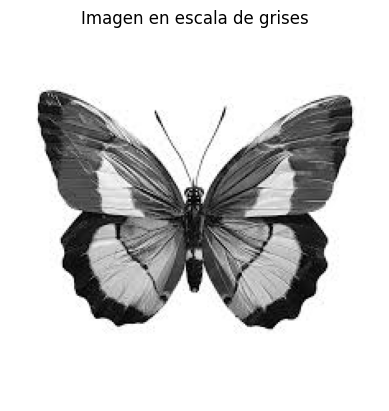

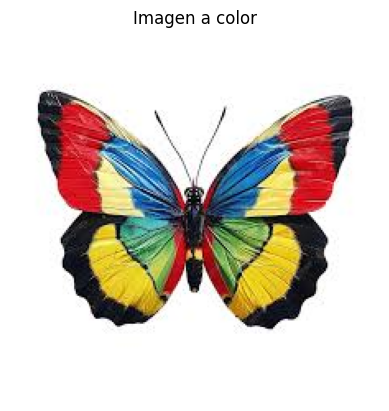

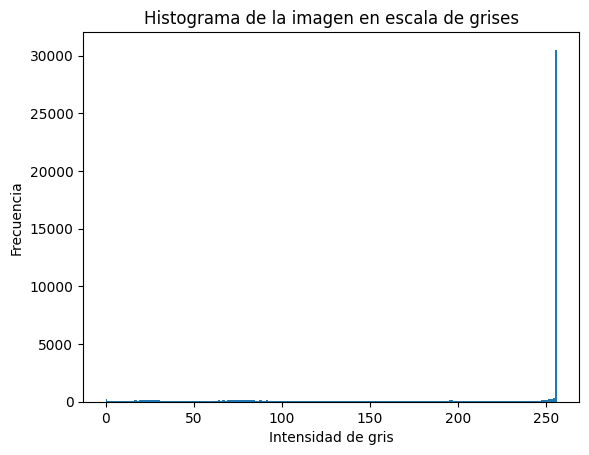

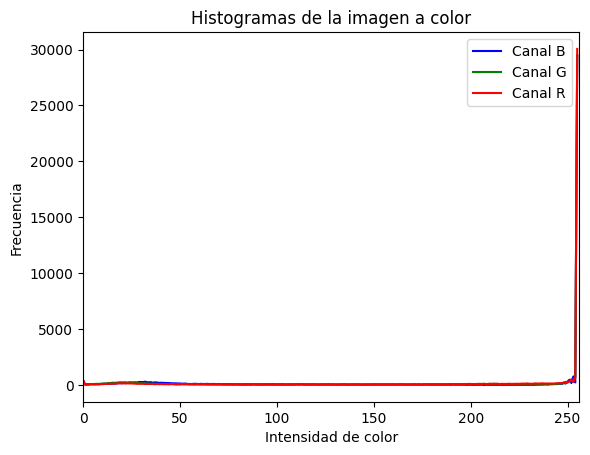

In [5]:
img_gris = cv2.imread('mariposa.jpg', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('mariposa.jpg')


show_image(img_gris, title='Imagen en escala de grises')
show_image(img_color, title='Imagen a color')

calc_hist(img_gris, is_gray=True, title='Histograma de la imagen en escala de grises')
calc_hist(img_color, title='Histogramas de la imagen a color', colors=['b', 'g', 'r'])



2. Convertir una imagen de color a escala de grises y HSV. Extraer cada canal de color por separado y
mostrarlo con histograma.

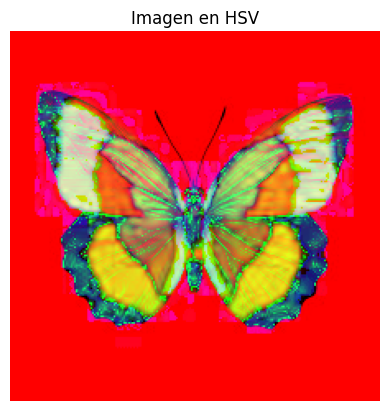

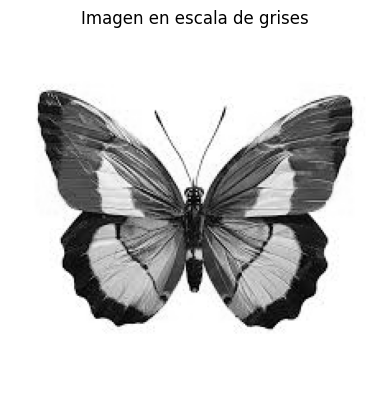

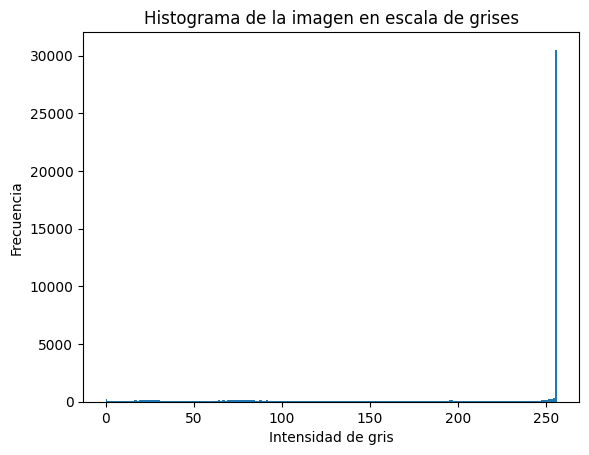

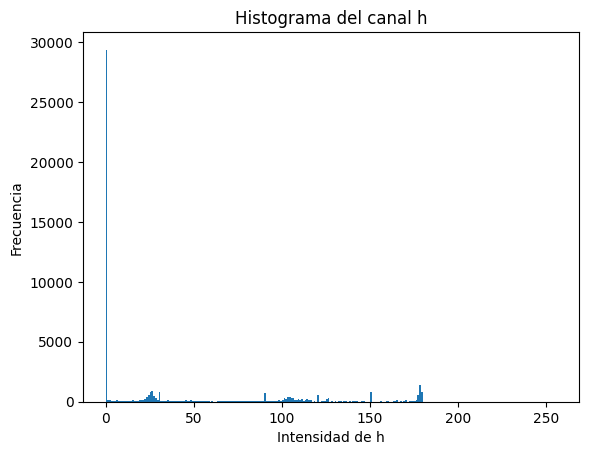

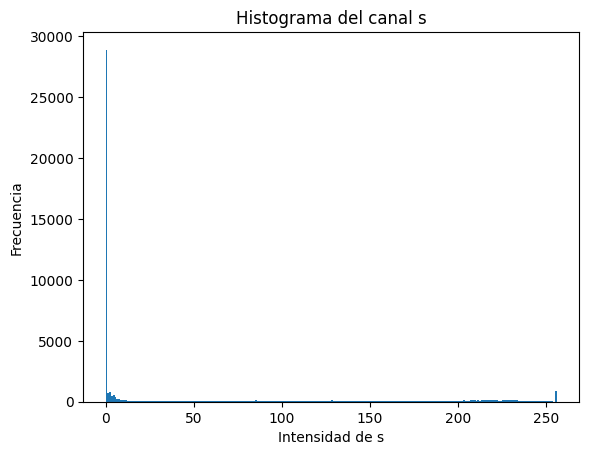

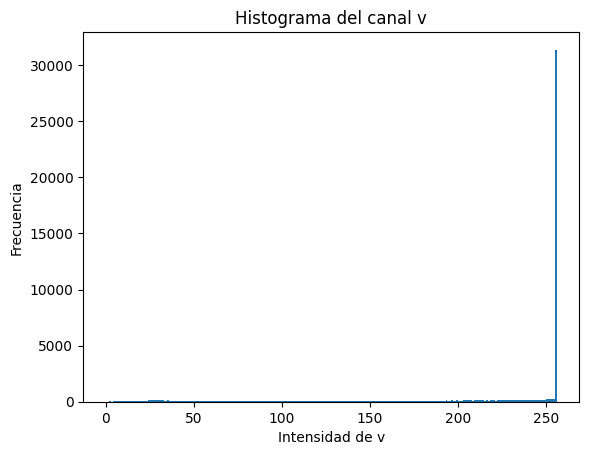

In [6]:
img = cv2.imread('mariposa.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(img_hsv, 'Imagen en HSV')
show_image(img_gray, 'Imagen en escala de grises')

calc_hist(img_gris, is_gray=True, title='Histograma de la imagen en escala de grises')
calc_hist(img_hsv, title='Histogramas de la imagen en HSV', colors=['h', 's', 'v'], separate_channels=True)
    


3. Cargar una imagen en escala de grises y a color. Posteriormente, modificar un conjunto de pıxeles en
una region especıfica (por ejemplo, convertir una zona a negro). Calcular el negativo de una imagen
invirtiendo los valores de pıxeles.


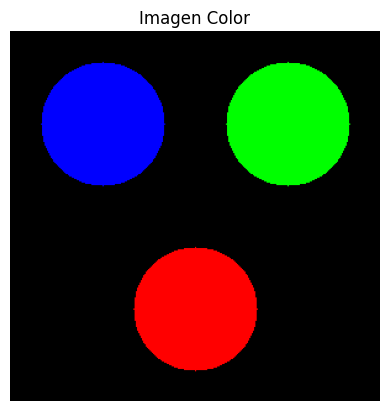

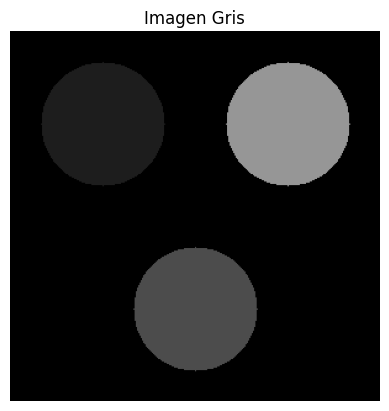

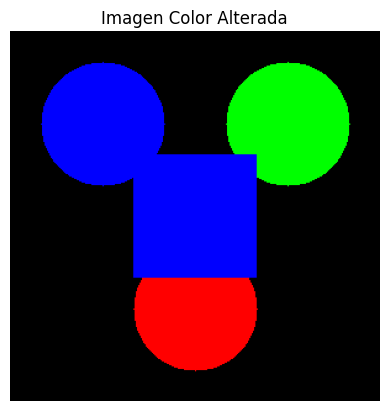

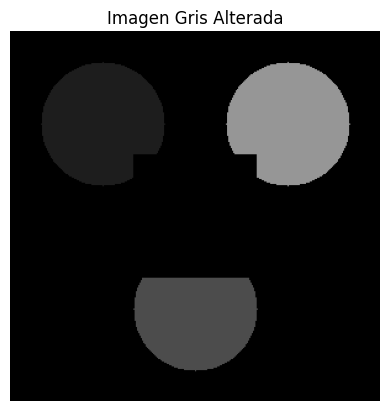

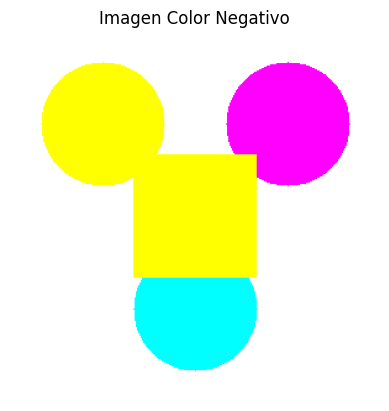

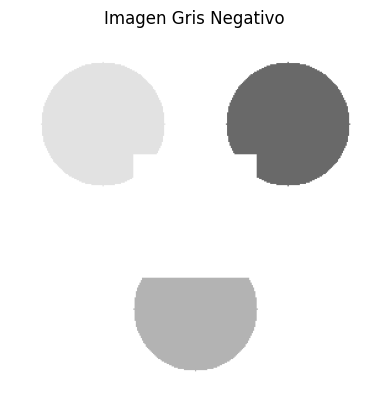

In [4]:
img = cv2.imread('img_color3.png')
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_image(img, 'Imagen Color')
show_image(img_gris, 'Imagen Gris')

img[100:200,100:200] = [255,0,0] # cuadrado azul
img_gris[100:200,100:200] = [0] # Cuadrado negro

show_image(img, 'Imagen Color Alterada')
show_image(img_gris, 'Imagen Gris Alterada')

img_negativo = cv2.bitwise_not(img)
img_gris_negativo = cv2.bitwise_not(img_gris)

show_image(img_negativo, 'Imagen Color Negativo')
show_image(img_gris_negativo, 'Imagen Gris Negativo')




4. Implementar una transformacion lineal de la forma I’=α I+β donde α es el factor de contraste y β
es el ajuste de brillo.

In [5]:
def ajuste_brillo_contraste(img, alfa, beta):
    img_float = img.astype(np.float32) # transformamos a float para poder tener una representacion transitoria de las operaciones
    img_ajustada = alfa * img + beta
    return np.clip(img_ajustada, 0, 255).astype(np.uint8) # clip limita los valores dentro del intervalo 0-255

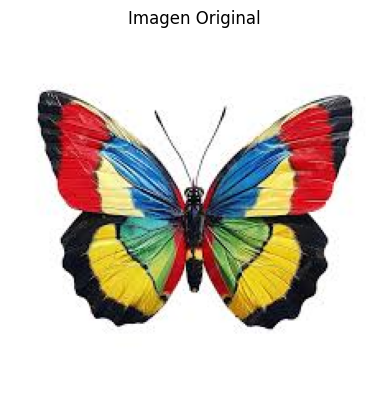

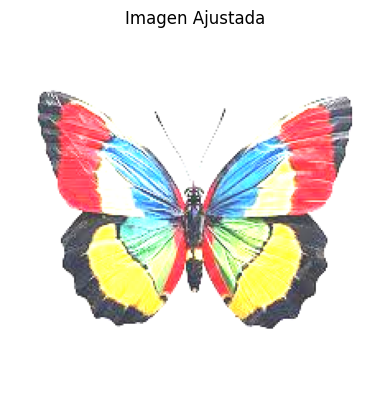

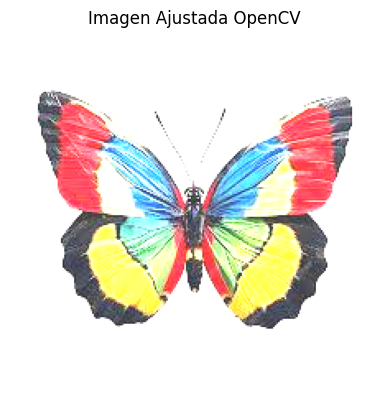

In [8]:
img = cv2.imread('mariposa.jpg')

show_image(img, 'Imagen Original')

#Version casera
img_ajustada = ajuste_brillo_contraste(img, 1.5, 50) # Aumento de contraste y brillo
show_image(img_ajustada, 'Imagen Ajustada')

#Version OpenCV
img_ajustada_opencv = cv2.convertScaleAbs(img, alpha=1.5, beta=50)
show_image(img_ajustada_opencv, 'Imagen Ajustada OpenCV')


5. Cargar dos imagenes diferentes (por ejemplo, fotos tomadas en diferentes condiciones de iluminacion).
Calcular sus histogramas y compararlos usando diferentes metricas (correlacion, chi-cuadrado, interseccion).

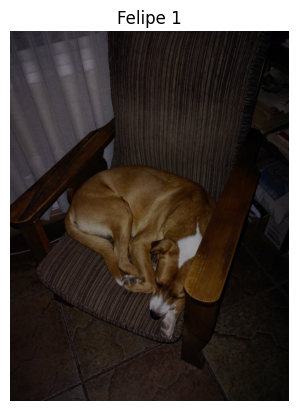

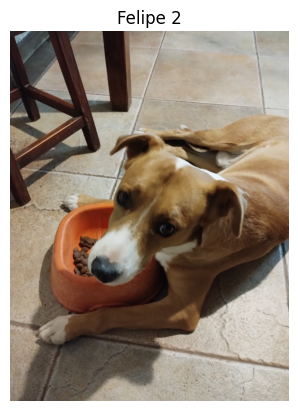

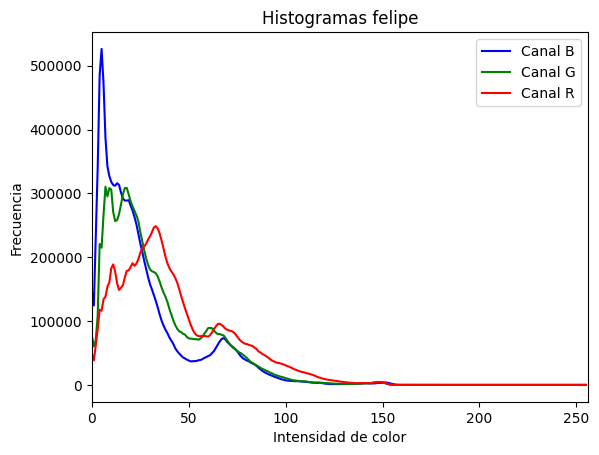

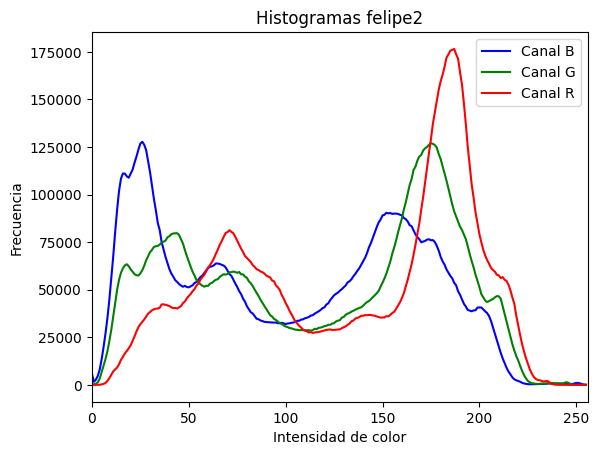

Correlacion:
  Canal b: 0.3130895322849735
  Canal g: 0.05895293922479757
  Canal r: -0.18985577054581318

Chi Cuadrado:
  Canal b: 41570.41029804824
  Canal g: 74616.2461021404
  Canal r: 63951.29740792973

Interseccion:
  Canal b: 4.566618890907193
  Canal g: 4.466269990274668
  Canal r: 4.041568183233494



In [11]:
felipe = cv2.imread('felipe.jpg')
felipe2 = cv2.imread('felipe2.jpg')

show_image(felipe, 'Felipe 1')
show_image(felipe2, 'Felipe 2')

hist_felipe = calc_hist(felipe, title='Histogramas felipe', colors=['b', 'g', 'r'])
hist_felipe2 = calc_hist(felipe2, title='Histogramas felipe2', colors=['b', 'g', 'r'])

# Normalizamos los histogramas para que tengan la misma escala (es necesario para comparar correctamente sino las fotos podrian tener distinta cantidad de pixeles)
for h1, h2 in zip(hist_felipe, hist_felipe2):
    cv2.normalize(src=h1,dst=h1)
    cv2.normalize(src=h2,dst=h2)

metodos = {
    'Correlacion': cv2.HISTCMP_CORREL,
    'Chi Cuadrado': cv2.HISTCMP_CHISQR,
    'Interseccion': cv2.HISTCMP_INTERSECT
}
resultados = {metodo: [] for metodo in metodos}

for i, canal in enumerate(['b', 'g', 'r']):
    for nombre, metodo in metodos.items():
        resultado = cv2.compareHist(hist_felipe[i], hist_felipe2[i], metodo)
        resultados[nombre].append(resultado)

for nombre, resultado in resultados.items():
    print(f'{nombre}:')
    for i, canal in enumerate(['b', 'g', 'r']):
        print(f'  Canal {canal}: {resultado[i]}')
    print()
        


6. Explicar que diferencias se pueden observar en los histogramas.


7. (*) Transformar la distribuci´on de intensidades de una imagen para que se parezca a la de otra. Implementar el ajuste de histograma usando OpenCV o skimage.exposure.match histograms(). Comparar
los histogramas antes y despu´es del ajuste.


8. (*) Aplicar ecualizaci´on de histograma a una imagen en escala de grises. Comparar la imagen original
con la ecualizada.

9. (*) Implementar una umbralizaci´on manual eligiendo un valor de umbral. Usar el m´etodo de Otsu
para calcular un umbral ´optimo autom´aticamente.

10. Aplicar ecualizaci´on de histograma adaptativa (CLAHE) y analizar su efecto en im´agenes con mucho
contraste.

11. (*) Implementar la transformaci´on gamma I’=I
y
, permitiendo ajustar el valor de y din´amicamente.
Aplicar diferentes valores de y en distintas regiones de la imagen (por ejemplo, usando una m´ascara
o adaptando y en funci´on del brillo local). Visualizar el efecto de la correcci´on gamma en la imagen
y en su histograma.